In [56]:
import powerlaw
import numpy as np
import igraph as ig
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

Load the NYC Subway Graph

In [57]:
nyc = ig.read("../data/nyc_subway.gml")


# Test Scale Free Property in the Network

In [58]:
node_degree = np.array(nyc.degree())

We fit the empirical data to a Power Law distribution using the `powerlaw` package introduced by:

*Jeff Alstott, Ed Bullmore, Dietmar Plenz. (2014). powerlaw: a Python package for analysis of heavy-tailed distributions. PLoS ONE 9(1): e85777*

Text(0.5, 1.0, 'Log-Log Plot')

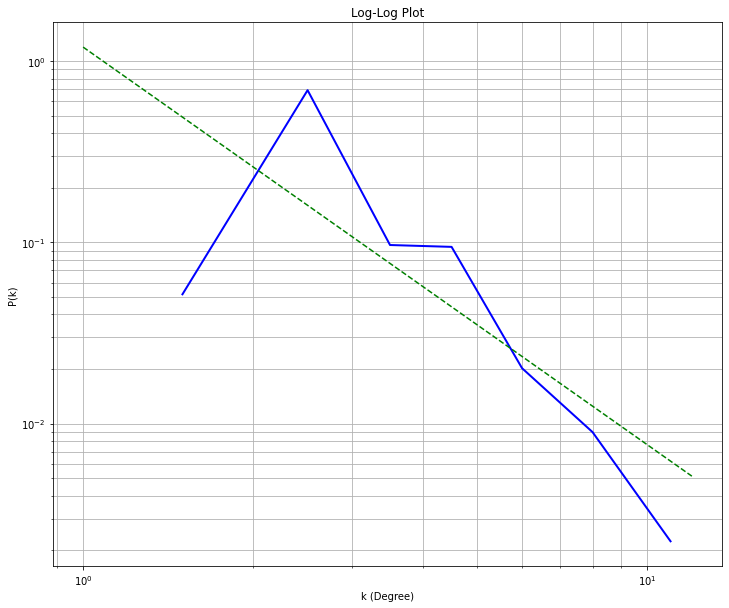

In [68]:
fit = powerlaw.Fit(node_degree, xmin=1)

f, ax = plt.subplots(figsize=(12, 10))
_ = fit.plot_pdf(color='b', linewidth=2, ax=ax)
_ = fit.power_law.plot_pdf(color='g', linestyle='--', ax=ax)

ax.grid(which="both")
ax.set_xlabel("k (Degree)")
ax.set_ylabel("P(k)")
ax.set_title("Log-Log Plot")

In [62]:
def PowerLawPDF(alpha):
    def pdf(x):
        return x ** -alpha
    return pdf

In [63]:
def plot_variable(variable: np.ndarray):
    kde = gaussian_kde(variable)
    dist_space = np.linspace(min(variable), max(variable), 100)
    f, ax = plt.subplots(figsize=(12, 10))
    ax.plot(dist_space, kde(dist_space))
    return f, ax

Text(0.5, 1.0, 'Probability Density Plot')

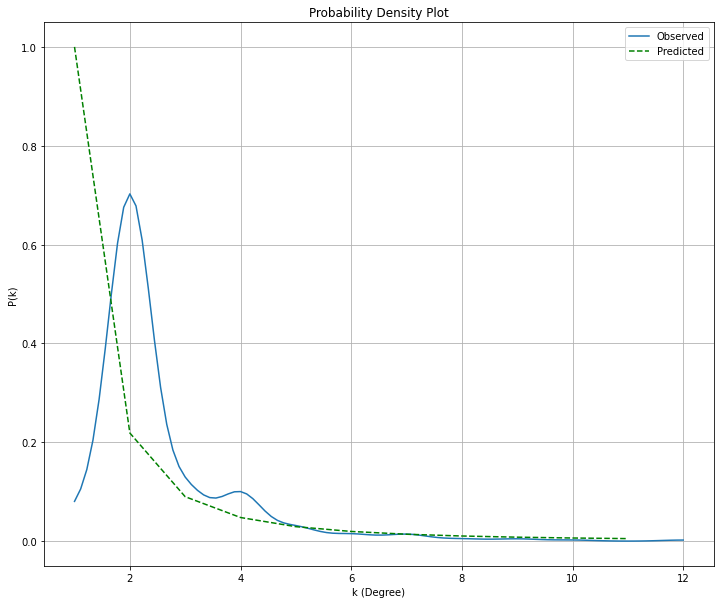

In [70]:
f, ax = plot_variable(node_degree)

pdf = PowerLawPDF(fit.alpha)
degree_range = np.array(range(min(node_degree), max(node_degree)))
probs = pdf(degree_range)
ax.plot(degree_range, probs, "g--")

ax.legend(["Observed", "Predicted"])
ax.set_ylabel("P(k)")
ax.set_xlabel("k (Degree)")
ax.grid(which="both")
ax.set_title("Probability Density Plot")

Comparing the observed data with the model fitted using a power law, we can see that the degree distribution of the network does not follow a that of a scale-free network.